## **Advanced data vizualisation using hdf5 datafiles from Institut Néel**
- Version: 1.0 <br>
- Author: William Rigaut <br>
- Date: 17.06.2025  <br>
- Package developped at Institut Néel to visualize and manipulate the data with python commands. A tool to quickly visualize the data is already available at https://github.com/Escouflenfer/combinatorials-app. This Notebook will allow you to customize plots with much less restrictions but needs basic python knowledge.

### **1. Introduction**

<p>An <b>HDF5</b> datafile compiled from high-throughput experiments at Institut Néel contains different measurement scans for each point in a 2D-grid over a thin film deposited on a 100mm substrate. This 2D-grid contains a point every 5mm centered around the center of the wafer itself, by considering the circular shape of the substrate one datafile contains 249 scans for each main characterization technique.</p>

<p>At each position, four main characterization techniques can be performed: <p>

- <b>Energy Dispersive X-ray spectroscopy (EDX)</b> where element composition can be determined using a scanning electron microscope.

- <b>Scanning Magneto Optics Kerr Effect (MOKE)</b> where the coercive field on the surface of a magnetic thin film can be obtained by a fast optical measurement under a pulsed magnetic field.

- <b>X-Ray Diffraction (XRD)</b> where structural properties can be determined (Phases and lattice parameters) using either a automated laboratory diffractometer or synchrotron radiation.

- <b>Profilometry (DEKTAK)</b>  is also used to estimate magnetic film thickness at every position with a calibration experiment using a patterned substrate. This technique is new and it has not been applied to older datasets. Profilometry data will be added in a futur version of the package and is currently not supported.

The HDF5 file structure is defined using a standard very similar to the <b>NeXuS hdf5 file format</b> used in synchrotron facilities (https://www.nexusformat.org/).

### **2. Read and display data from hdf5 file using a GUI**

Before starting, you can download the example dataset [here](https://drive.google.com/file/d/1mE-7jC6ur7xdcSRf6CvO0iAE3oxIJdZA/view?usp=sharing). This file contains a full dataset for the (NdLaCe)FeB system.

A first overview of the HDF5 datafile can be done using a graphical user interface (GUI) program such as:
- `pyMca` http://www.silx.org/doc/PyMca/dev/install.html
- `hdf5view` https://pypi.org/project/hdf5view/

<p>Without GUI, the python module <b>h5py</b>, which is actually used by the reader can also be considered.</p>

<p>Here is an example with the PyMca software:</p>

![HDF5 file display using PyMca software](examples/Figure_1-PyMca.png)

Inside the hdf5 file you will be able to find a first subgroup labeled `entry`, containing 4 groups:
- `edx` containing all EDX scans at each wafer position.
- `moke` containing all MOKE scans at each wafer position.
- `sample` containing basic sample info such as layer structure, deposition temperature, ect...
- `xrd` containing all XRD scans at each wafer position.

These group will be reviewed in more details using the reader itself, but feel free to explore the dataset on your own and please ask me if you find something you think is not very clear or convenient.

### **3. Using the hdf5 reader from Institut Néel**

##### **3.1 Default xarray full dataset**

First, you can import the `read_hdf5` functions along the `pathlib` python library to use path that are OS independant.

In [1]:
import packages.readers.read_hdf5 as read_hdf5
import pathlib

Then you simply need to specify the path to your HDF5 datafile using the following command: 

In [2]:
HDF5_path = pathlib.Path("/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/NdCeFeB_2-5.hdf5")

The package `read_hdf5` includes a function `get_full_dataset()` that will read inside the HDF5 file to retrieve <b>composition</b>, <b>coercivity</b> and <b>lattice parameters</b> of all the fitted phases for every position using an xarray. You can call it by using the following:


In [3]:
data = read_hdf5.get_full_dataset(HDF5_path)
data # To display the xarray in the notebook

<xarray.Dataset> Size: 33kB
Dimensions:                       (y: 17, x: 17)
Coordinates:
  * y                             (y) float64 136B -40.0 -35.0 ... 35.0 40.0
  * x                             (x) float64 136B -40.0 -35.0 ... 35.0 40.0
Data variables: (12/14)
    Ce Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    Fe Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd Composition                (y, x) float64 2kB nan nan nan ... nan nan nan
    coercivity_dmdh               (y, x) float64 2kB nan nan nan ... nan nan nan
    coercivity_m0                 (y, x) float64 2kB nan nan nan ... nan nan nan
    intercept_field               (y, x) float64 2kB nan nan nan ... nan nan nan
    ...                            ...
    Nd2Fe14B Phase Fraction       (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2Fe14B Lattice Parameter A  (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2Fe14B Lattice Parameter C  (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2O3 Phase Fraction          (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2O3 Lattice Parameter A     (y, x) float64 2kB nan nan nan ... nan nan nan
    Nd2O3 Lattice Parameter C     (y, x) float64 2kB nan nan nan ... nan nan nan

If you are only interested in one data variable, for example `Coercivity`, you can simply select this data with:

In [4]:
coercivity = data["coercivity_m0"] # Data variables can be selected using the 
                                # dictionary syntax in python
coercivity

<xarray.DataArray 'coercivity_m0' (y: 17, x: 17)> Size: 2kB
array([[       nan,        nan,        nan,        nan,        nan,
               nan, 0.96913695, 0.95205417, 0.96472983, 0.89947314,
        0.91803719,        nan,        nan,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan, 0.98579869,
        1.10024586, 1.10038818, 1.14193662, 1.13094993, 1.1024602 ,
        1.07321564, 0.9678673 , 0.89146956,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 1.03820369, 1.22565969,
        1.22300228, 1.22582148, 1.23118696, 1.19290564, 1.1814936 ,
        1.14524371, 1.07648863, 0.97475432, 0.87632319,        nan,
               nan,        nan],
       [       nan,        nan, 1.07964113, 1.21728488, 1.31748277,
        1.29480716, 1.31611217, 1.34536573, 1.29663224, 1.22682958,
        1.15423914, 1.13546583, 0.96658051, 0.90159016, 0.807543  ,
               nan,        nan],
       [       nan, 1.09867619, 1.19232261, 1.27004007, 1.31438301,
        1.33355087, 1.31702225, 1.33653521, 1.24976845, 1.24017258,
        1.25607054, 1.21367603, 1.03050507, 1.01331295, 0.90411888,
        0.72213746,        nan],
...
       [       nan, 1.04814462, 1.16318003, 1.27171536, 1.32457592,
        1.2939267 , 1.23831862, 1.2314011 , 1.18336951, 1.12070018,
        1.09763259, 1.0324293 , 0.93603455, 0.79623389, 0.6137116 ,
        0.56730624,        nan],
       [       nan,        nan, 1.01891793, 1.12155329, 1.1835854 ,
        1.24764574, 1.2005949 , 1.18039188, 1.21098624, 1.11864542,
        1.06633962, 0.9009874 , 0.74379206, 0.67564948, 0.60658843,
               nan,        nan],
       [       nan,        nan,        nan, 0.96373141, 1.09331763,
        1.1232167 , 1.14066747, 1.11473475, 1.07770266, 0.97368773,
        0.85287587, 0.72344807, 0.68305871, 0.61190775,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan, 0.83300906,
        0.88080454, 0.89391547, 0.94647286, 0.87446944, 0.80616986,
        0.67102734, 0.61474932, 0.60731742,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan, 0.67190751, 0.68249469, 0.6320131 , 0.56544256,
        0.54054832,        nan,        nan,        nan,        nan,
               nan,        nan]])
Coordinates:
  * y        (y) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
  * x        (x) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
Attributes:
    units:    T

- It can also be convenient to plot the data in a 2D heatmap using `plot()` on the xarray.
- If you want to choose a particular colormap you can instead use `plot.pcolormesh(cmap='your_cmap')`. In this example, I choosed the `rainbow` color map.

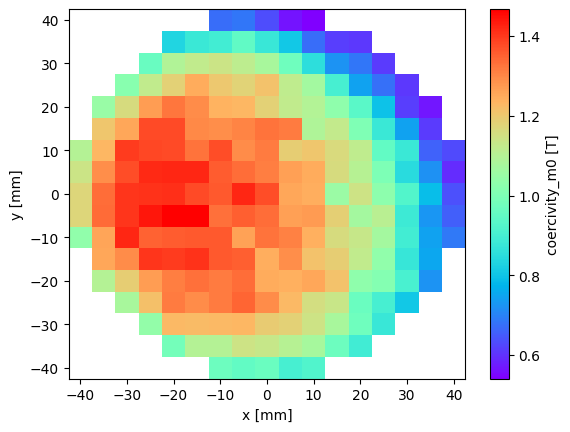

In [5]:
coercivity_plot = coercivity.plot.pcolormesh(cmap='rainbow')

You can also select subsets with the `sel()` function by specifiying in argument which values of x and y you need. For more advanced xarray operations you can directly check https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

The following examples include a line selection for Nd composition and a single position for the lattice parameter C of the main NdFeB magnetic phase.

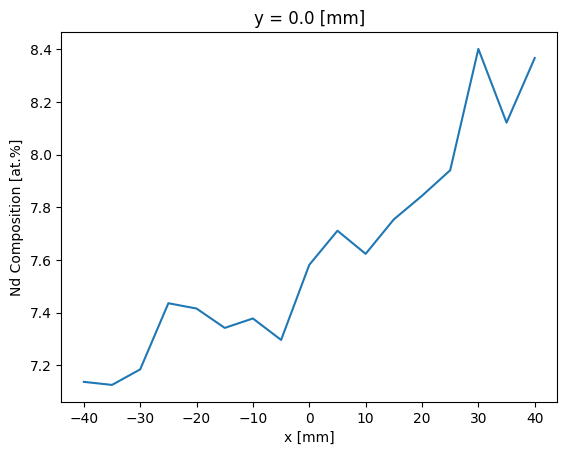

In [6]:
# Line x=0 selected for Nd composition
composition_Nd = data["Nd Composition"] # Nd composition data variable
line_scan_Nd = composition_Nd.sel(y=0) # Selecting the line x=0
line_scan_Nd_plot = line_scan_Nd.plot()

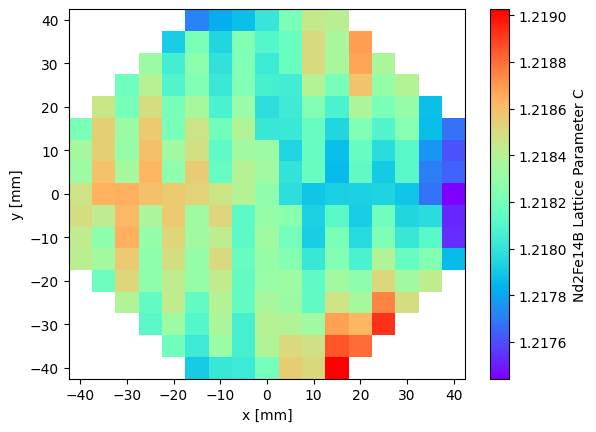

In [7]:
# Lattice parameter C for NdFeB at position (-15,-30)
lattice_parameter_C_NdFeB = data["Nd2Fe14B Lattice Parameter C"] #Lattice parameter C for NdFeB phase
lattice_parameter_C_NdFeB.plot.pcolormesh(cmap='rainbow')

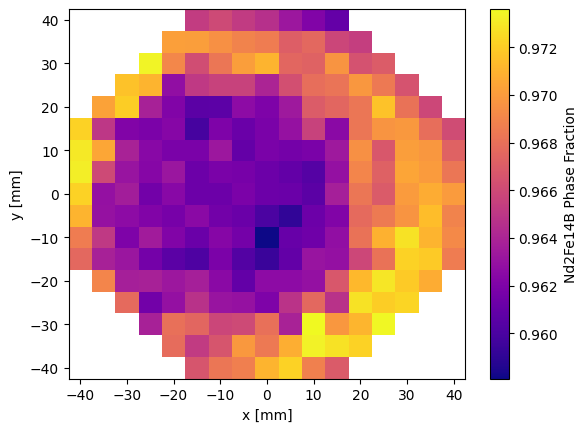

In [8]:
phase_plot = data["Nd2Fe14B Phase Fraction"].plot.pcolormesh(cmap='plasma')

In [14]:
# Ternary plot
import plotly.express as px
import pandas as pd

Nd = (data["Nd Composition"].values*100).reshape(-1)
Ce = (data["Ce Composition"].values*100).reshape(-1)
Fe = (data["Fe Composition"].values*100).reshape(-1)
coercivity = data["coercivity_m0"].values.reshape(-1)
df = pd.DataFrame({"Nd Composition": Nd, "Ce Composition": Ce, "Fe Composition": Fe, "Coercivity": coercivity})

fig = px.scatter_ternary(df, a='Nd Composition', b='Ce Composition', c='Fe Composition', color='Coercivity', color_continuous_scale='rainbow', width=800, height=800)

fig.show()

##### **3.2 Getting xarray datasets containing measurement data**

If you need to work with the measurement readout instead, the function `get_measurement_data()` will return an xarray DataTree object containing all the scans of every experiment.

In [10]:
all_scans = read_hdf5.get_measurement_data(HDF5_path, data_type="all")

In [11]:
all_scans # You can visualize its content in the notebook by calling the variable

<xarray.DataTree 'Measurement Data'>
Group: /
├── Group: /EDX
│       Dimensions:  (y: 17, x: 17, counts: 4096, energy: 4096)
│       Coordinates:
│         * y        (y) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
│         * x        (x) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
│           counts   (y, x, counts) float64 9MB nan nan nan nan nan ... nan nan nan nan
│           energy   (y, x, energy) float64 9MB nan nan nan nan nan ... nan nan nan nan
├── Group: /MOKE
│       Dimensions:           (y: 17, x: 17, integrated_pulse: 2004,
│                              magnetization: 2004, pulse: 2004, reflectivity: 2004)
│       Coordinates:
│         * y                 (y) float64 136B -40.0 -35.0 -30.0 ... 30.0 35.0 40.0
│         * x                 (x) float64 136B -40.0 -35.0 -30.0 ... 30.0 35.0 40.0
│           integrated_pulse  (y, x, integrated_pulse) float64 5MB nan nan ... nan nan
│           magnetization     (y, x, magnetization) float64 5MB nan nan nan ... nan nan
│           pulse             (y, x, pulse) float64 5MB nan nan nan nan ... nan nan nan
│           reflectivity      (y, x, reflectivity) float64 5MB nan nan nan ... nan nan
└── Group: /XRD
        Dimensions:    (y: 17, x: 17, intensity: 2986, angle: 2986)
        Coordinates:
          * y          (y) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
          * x          (x) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
            intensity  (y, x, intensity) float64 7MB nan nan nan nan ... nan nan nan nan
            angle      (y, x, angle) float64 7MB nan nan nan nan nan ... nan nan nan nan

Before plotting, you need to select which dataset you want to plot as a function of another one, as an example :

In [26]:
# 1D pattern

import plotly.express as px
# Getting the angle and the intensity of the XRD pattern
angle = all_scans["XRD"]["angle"].sel(x=-15, y=-30).values.reshape(-1)
intensity = all_scans["XRD"]["intensity"].sel(x=-15, y=-30).values.reshape(-1)

df = pd.DataFrame({"Two-theta (°)": angle, "Intensity": intensity})

# Setting the labels for the plot from xarray attributs
px.line(df, x="Two-theta (°)", y="Intensity", width=800, height=600)

In [22]:
# More manipulations
import plotly.express as px

lattice_a = data["Nd2Fe14B Lattice Parameter A"].values.reshape(-1)
lattice_c = data["Nd2Fe14B Lattice Parameter C"].values.reshape(-1)
coercivity = data["coercivity_m0"].values.reshape(-1)
df = pd.DataFrame({"c/a": lattice_c/lattice_a, "Coercivity": coercivity})

# Setting the labels for the plot from xarray attributs
fig_scatter = px.scatter(df, x= "Coercivity", y="c/a", width=800, height=800)

fig_scatter.show()

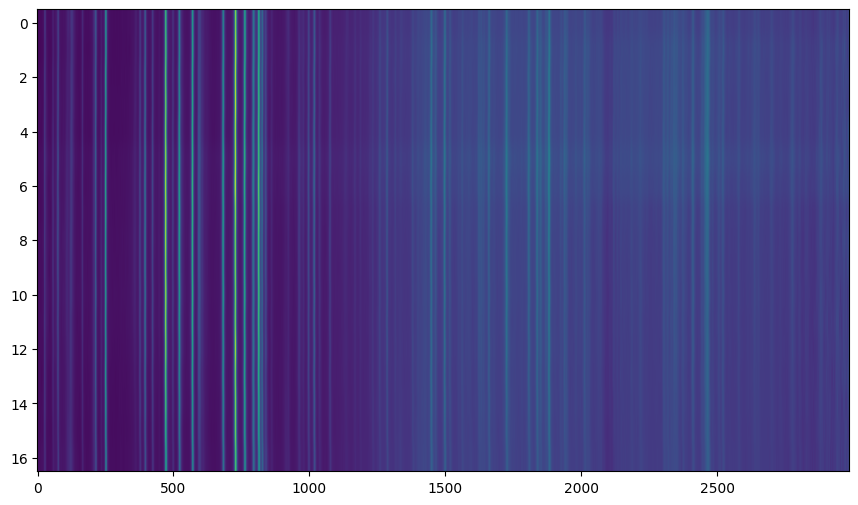

In [14]:
# Waterfall pattern

from matplotlib import pyplot as plt
# Getting the angle and the intensity of the XRD pattern
angle = all_scans["XRD"]["angle"].sel(x=-15, y=-30)
intensity = all_scans["XRD"]["intensity"].sel(y=-15)

plt.figure(figsize=(15,6))
plt.imshow(intensity, aspect=100)

In [ ]:
import packages.readers.read_hdf5 as read_hdf5
import pathlib

HDF5_path = pathlib.Path("/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/NdCeFeB_2-5.hdf5")
HDF5_simplified_path = pathlib.Path("/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/NdCeFeB_2-5.hdf5_simplified.hdf5")

read_hdf5.create_simplified_dataset(HDF5_path, HDF5_simplified_path)


Datatype: edx
Datatype: xrd
Datatype: moke


In [ ]:
# import h5py

# filepath = "/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/CeCoZn_4-3.hdf5"

# with h5py.File(filepath, "a") as h5f:
#     group = h5f["CeCoZn_4-3_ESRF"]

#     for key in group.keys():
#         for subkey in group[key].keys():
#             if subkey == "results":
#                 print(f"Deleted {group[key][subkey]}")
#                 del group[key][subkey]
                


### **Appendix A. CHADA Tables and Diagrams for High Throughput Experiments at Néel Institut**

#### **A.1 CHADA Diagrams**

CHADA Diagrams are used in MaMMoS to describe the flowchart of an experiment with a simple skematic. Each step is described with a short explanation and a color:

- RED: Indicates what type of sample was used to start the experiment.

- BLUE: Shows what needs to be done during the experiment to obtain the measured data.

- DARK GREEN: Raw data measured directly from the experiment.

- LIGHT GREEN: Treated data, usually extracted for the raw data using a software or a python code.

- DARK BLUE CONTOUR: Final treated data, is the content that you obtain from the `get_full_dataset()` command.

##### **CHADA Diagram for EDX (click left to display):**

![EDX Diagram](examples/EDX.svg)

##### **CHADA Diagram for MOKE:**

![MOKE Diagram](examples/MOKE.svg)

##### **CHADA Diagram for XRD:**

![XRD Diagram](examples/XRD.svg)

#### **A.2 CHADA Tables**
CHADA Tables are used in MaMMoS to describe in details each experiment with a longer description that diagrams. Each important point about the experiment is described in a few lines. The color code is the same as for CHADA Tables.

##### **CHADA Table for EDX:**

![EDX Table](examples/CHADA_TABLES_EDX.svg)

##### **CHADA Table for MOKE:**

![MOKE Table](examples/CHADA_TABLES_MOKE.svg)

##### **CHADA Table for XRD:**

![XRD Table](examples/CHADA_TABLES_XRD.svg)

### **@end-of-notebook**